In [1]:
import graphviz
import spacy
from collections import OrderedDict

nlp = spacy.load('en') 

In [21]:
class Graph(object):
    """ Based on object here - https://www.python-course.eu/graphs_python.php"""
    
    def __init__(self, spacy_token=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        # Can we split this between 3 variables - name, label, root_token, all_tokens?
        self.__graph_dict = OrderedDict()
        self.__token_dict = OrderedDict()
        self.__layer_dict = OrderedDict()
        if spacy_token:
            self.build_graph(spacy_token)

    @property
    def nodes(self):
        """ returns the nodes of a graph """
        return list(self.__graph_dict.keys())

    @property
    def edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_node(self, node, token=None):
        """ If the node "node" is not in 
            self.__graph_dict, a key "node" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if node not in self.__graph_dict:
            self.__graph_dict[node] = []
        if node not in self.__token_dict:
            self.__token_dict[node] = token
            self.__layer_dict[node] = []
            self.__layer_dict[node].append(token)

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two nodes can be multiple edges! 
        """
        (node1, node2) = tuple(edge)
        if node1 in self.__graph_dict:
            self.__graph_dict[node1].append(node2)
        else:
            self.__graph_dict[node1] = [node2]

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the node) or two 
            node 
        """
        edges = []
        for node in self.__graph_dict:
            for neighbour in self.__graph_dict[node]:
                if (neighbour, node) not in edges:
                    edges.append((node, neighbour))
        return edges

    def __str__(self):
        res = "nodes: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res
    
    def merge_nodes(self, parent_node, child_node):
        """Merge child node into parent node"""
        pass
    
    def remove_node(self, node):
        self.__graph_dict.pop(node, None)
        self.__token_dict.pop(node, None)
        self.__layer_dict.pop(node, None)
    
    def remove_edge(self, edge):
        pass
    
    def get_graphviz(self):
        """ Visualise via Graphviz."""
        gv = graphviz.Digraph()
        for node in self.nodes:
            gv.node(node)
        for node1, node2 in self.edges:
            gv.edge(node1, node2)
        return gv
    
    def build_graph(self, token):
        """ Print a graph ."""
        # Add node to graph
        node_name = "{0}_{1}_{2}_{3}".format(token.text, token.tag_, token.dep_, token.i)
        self.add_node(node_name, token)
        for child in token.children:
            child_name = self.build_graph(child)
            self.add_edge((node_name, child_name))
        return node_name

In [22]:
test_sent = nlp("""It is also recognised that the body of the receptacle can be configured to include only one resilient arm that is biased with respect to the wall of the body, thus facilitating the retention of the stylus between the one arm and the wall (and/or other rigid secondary structures of the body).""")

In [23]:
root = list(test_sent.sents)[0].root
g = Graph(root)

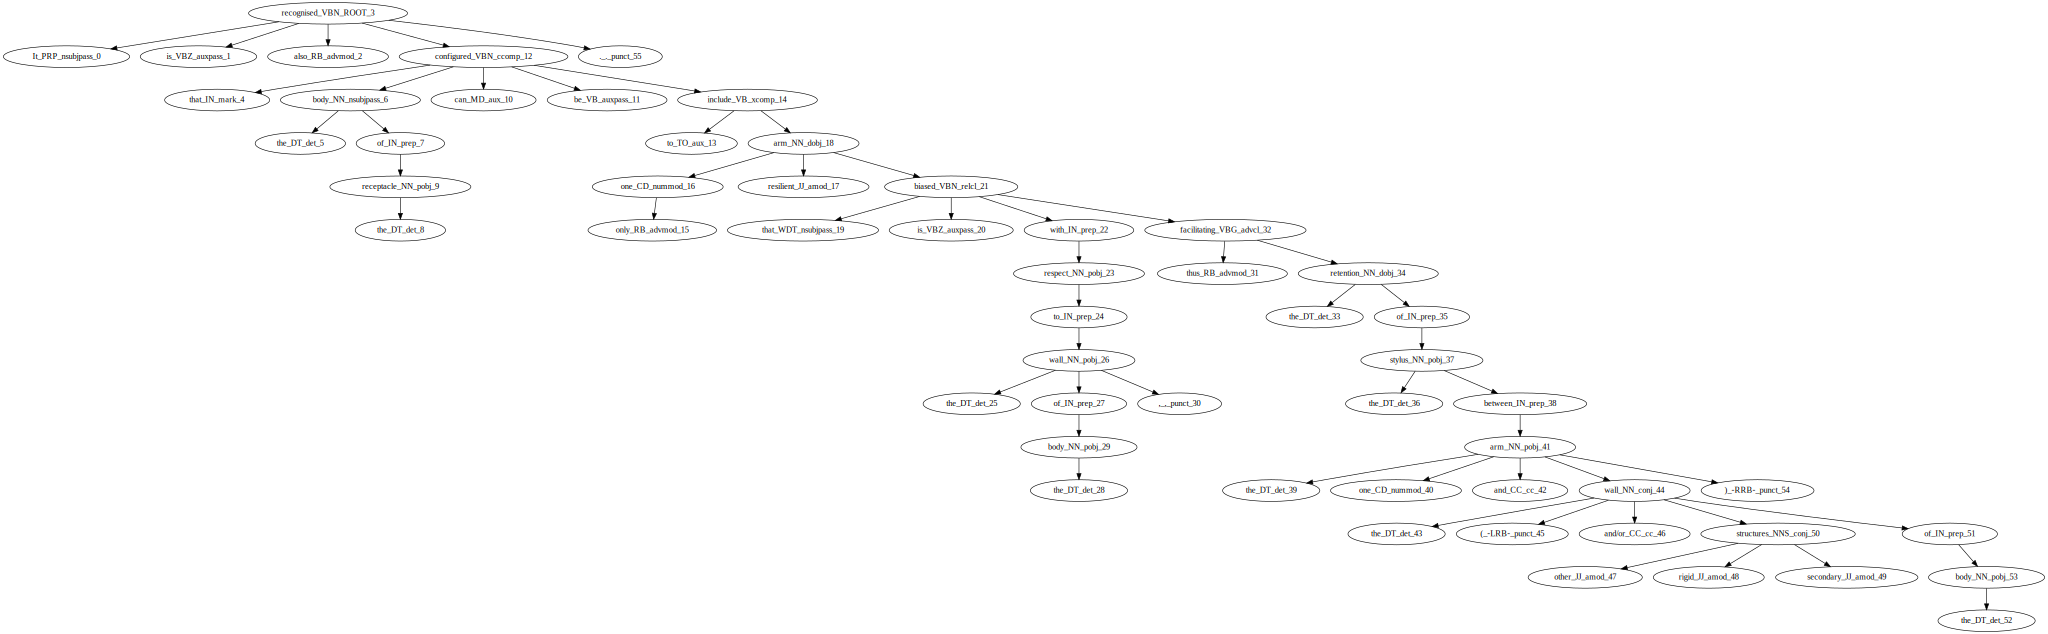

In [24]:
g.get_graphviz()

In [25]:
g._Graph__graph_dict

OrderedDict([('recognised_VBN_ROOT_3',
              ['It_PRP_nsubjpass_0',
               'is_VBZ_auxpass_1',
               'also_RB_advmod_2',
               'configured_VBN_ccomp_12',
               '._._punct_55']),
             ('It_PRP_nsubjpass_0', []),
             ('is_VBZ_auxpass_1', []),
             ('also_RB_advmod_2', []),
             ('configured_VBN_ccomp_12',
              ['that_IN_mark_4',
               'body_NN_nsubjpass_6',
               'can_MD_aux_10',
               'be_VB_auxpass_11',
               'include_VB_xcomp_14']),
             ('that_IN_mark_4', []),
             ('body_NN_nsubjpass_6', ['the_DT_det_5', 'of_IN_prep_7']),
             ('the_DT_det_5', []),
             ('of_IN_prep_7', ['receptacle_NN_pobj_9']),
             ('receptacle_NN_pobj_9', ['the_DT_det_8']),
             ('the_DT_det_8', []),
             ('can_MD_aux_10', []),
             ('be_VB_auxpass_11', []),
             ('include_VB_xcomp_14', ['to_TO_aux_13', 'arm_NN_dobj_18']),

Merge terminal nodes:
* for node in nodes
* get children of node - iterate through
* if child = terminal i.e. = [] merge with above

In [12]:
g._Graph__graph_dict['also_RB_advmod_2']

[]

In [26]:
g._Graph__token_dict

OrderedDict([('recognised_VBN_ROOT_3', recognised),
             ('It_PRP_nsubjpass_0', It),
             ('is_VBZ_auxpass_1', is),
             ('also_RB_advmod_2', also),
             ('configured_VBN_ccomp_12', configured),
             ('that_IN_mark_4', that),
             ('body_NN_nsubjpass_6', body),
             ('the_DT_det_5', the),
             ('of_IN_prep_7', of),
             ('receptacle_NN_pobj_9', receptacle),
             ('the_DT_det_8', the),
             ('can_MD_aux_10', can),
             ('be_VB_auxpass_11', be),
             ('include_VB_xcomp_14', include),
             ('to_TO_aux_13', to),
             ('arm_NN_dobj_18', arm),
             ('one_CD_nummod_16', one),
             ('only_RB_advmod_15', only),
             ('resilient_JJ_amod_17', resilient),
             ('biased_VBN_relcl_21', biased),
             ('that_WDT_nsubjpass_19', that),
             ('is_VBZ_auxpass_20', is),
             ('with_IN_prep_22', with),
             ('respect_NN_pobj_2

In [32]:
eg_t = g._Graph__token_dict['It_PRP_nsubjpass_0']
print(eg_t)
type(eg_t)
list(eg_t.lefts)

It


[]

In [33]:
eg_t in list(eg_t.lefts)

False

In [44]:
l_eg_t = g._Graph__layer_dict['recognised_VBN_ROOT_3']
print(l_eg_t)
# index = g_copy._Graph__layer_dict[node].index(g_copy._Graph__token_dict[node])

[recognised]


In [52]:
g_copy = Graph(root)

nodes_to_pop = []
for node in g_copy.nodes:
    # Get nodes connected to current node
    children = g_copy._Graph__graph_dict[node]
    print(node)
    print(children)
    children_to_remove = []
    # Iterate through connected nodes
    for child in children:
        print(child)
        # If connected node has no children
        if not g_copy._Graph__graph_dict[child]:
            # Merge with parent
            
            # Can I just use the index to position?
            
            # If token is to the left of the parent add before parent
            if g_copy._Graph__token_dict[child] in list(g_copy._Graph__token_dict[node].lefts):
                index = g_copy._Graph__layer_dict[node].index(g_copy._Graph__token_dict[node])
                g_copy._Graph__layer_dict[node].insert(index, g_copy._Graph__token_dict[child])
            # If token is to the right of parent add to the end
            if g_copy._Graph__token_dict[child] in list(g_copy._Graph__token_dict[node].rights):
                 g_copy._Graph__layer_dict[node].append(g_copy._Graph__token_dict[child])          
            
            # Add to children to remove from parent
            children_to_remove.append(child)
            # Add child to list to delete
            nodes_to_pop.append(child)
            
    for child in children_to_remove:
        # Remove child from parent node list
        g_copy._Graph__graph_dict[node].remove(child)
            
            

for ntp in nodes_to_pop:
    g_copy._Graph__graph_dict.pop(ntp, None)
    g_copy._Graph__token_dict.pop(ntp, None)
    g_copy._Graph__layer_dict.pop(ntp, None)

In [53]:
g_copy._Graph__layer_dict    

OrderedDict([('recognised_VBN_ROOT_3', [It, is, also, recognised, .]),
             ('configured_VBN_ccomp_12', [that, can, be, configured]),
             ('body_NN_nsubjpass_6', [the, body]),
             ('of_IN_prep_7', [of]),
             ('receptacle_NN_pobj_9', [the, receptacle]),
             ('include_VB_xcomp_14', [to, include]),
             ('arm_NN_dobj_18', [resilient, arm]),
             ('one_CD_nummod_16', [only, one]),
             ('biased_VBN_relcl_21', [that, is, biased]),
             ('with_IN_prep_22', [with]),
             ('respect_NN_pobj_23', [respect]),
             ('to_IN_prep_24', [to]),
             ('wall_NN_pobj_26', [the, wall, ,]),
             ('of_IN_prep_27', [of]),
             ('body_NN_pobj_29', [the, body]),
             ('facilitating_VBG_advcl_32', [thus, facilitating]),
             ('retention_NN_dobj_34', [the, retention]),
             ('of_IN_prep_35', [of]),
             ('stylus_NN_pobj_37', [the, stylus]),
             ('between_IN_p

In [59]:
g_copy._Graph__graph_dict

OrderedDict([('recognised_VBN_ROOT_3',
              ['It_PRP_nsubjpass_0',
               'is_VBZ_auxpass_1',
               'also_RB_advmod_2',
               'configured_VBN_ccomp_12',
               '._._punct_55']),
             ('configured_VBN_ccomp_12',
              ['that_IN_mark_4',
               'body_NN_nsubjpass_6',
               'can_MD_aux_10',
               'be_VB_auxpass_11',
               'include_VB_xcomp_14']),
             ('body_NN_nsubjpass_6', ['the_DT_det_5', 'of_IN_prep_7']),
             ('of_IN_prep_7', ['receptacle_NN_pobj_9']),
             ('receptacle_NN_pobj_9', ['the_DT_det_8']),
             ('include_VB_xcomp_14', ['to_TO_aux_13', 'arm_NN_dobj_18']),
             ('arm_NN_dobj_18',
              ['one_CD_nummod_16',
               'resilient_JJ_amod_17',
               'biased_VBN_relcl_21']),
             ('one_CD_nummod_16', ['only_RB_advmod_15']),
             ('biased_VBN_relcl_21',
              ['that_WDT_nsubjpass_19',
               'is_

g.nodes is set initially but we are popping the entry.

Instead we need to make a list of nodes to pop and do this at the end

In [55]:
g_copy._Graph__token_dict

OrderedDict([('recognised_VBN_ROOT_3', recognised),
             ('configured_VBN_ccomp_12', configured),
             ('body_NN_nsubjpass_6', body),
             ('of_IN_prep_7', of),
             ('receptacle_NN_pobj_9', receptacle),
             ('include_VB_xcomp_14', include),
             ('arm_NN_dobj_18', arm),
             ('one_CD_nummod_16', one),
             ('biased_VBN_relcl_21', biased),
             ('with_IN_prep_22', with),
             ('respect_NN_pobj_23', respect),
             ('to_IN_prep_24', to),
             ('wall_NN_pobj_26', wall),
             ('of_IN_prep_27', of),
             ('body_NN_pobj_29', body),
             ('facilitating_VBG_advcl_32', facilitating),
             ('retention_NN_dobj_34', retention),
             ('of_IN_prep_35', of),
             ('stylus_NN_pobj_37', stylus),
             ('between_IN_prep_38', between),
             ('arm_NN_pobj_41', arm),
             ('wall_NN_conj_44', wall),
             ('structures_NNS_conj_50', str

In [57]:
g_copy.nodes

['recognised_VBN_ROOT_3',
 'configured_VBN_ccomp_12',
 'body_NN_nsubjpass_6',
 'of_IN_prep_7',
 'receptacle_NN_pobj_9',
 'include_VB_xcomp_14',
 'arm_NN_dobj_18',
 'one_CD_nummod_16',
 'biased_VBN_relcl_21',
 'with_IN_prep_22',
 'respect_NN_pobj_23',
 'to_IN_prep_24',
 'wall_NN_pobj_26',
 'of_IN_prep_27',
 'body_NN_pobj_29',
 'facilitating_VBG_advcl_32',
 'retention_NN_dobj_34',
 'of_IN_prep_35',
 'stylus_NN_pobj_37',
 'between_IN_prep_38',
 'arm_NN_pobj_41',
 'wall_NN_conj_44',
 'structures_NNS_conj_50',
 'of_IN_prep_51',
 'body_NN_pobj_53']

In [58]:
g_copy.edges

[('recognised_VBN_ROOT_3', 'It_PRP_nsubjpass_0'),
 ('recognised_VBN_ROOT_3', 'is_VBZ_auxpass_1'),
 ('recognised_VBN_ROOT_3', 'also_RB_advmod_2'),
 ('recognised_VBN_ROOT_3', 'configured_VBN_ccomp_12'),
 ('recognised_VBN_ROOT_3', '._._punct_55'),
 ('configured_VBN_ccomp_12', 'that_IN_mark_4'),
 ('configured_VBN_ccomp_12', 'body_NN_nsubjpass_6'),
 ('configured_VBN_ccomp_12', 'can_MD_aux_10'),
 ('configured_VBN_ccomp_12', 'be_VB_auxpass_11'),
 ('configured_VBN_ccomp_12', 'include_VB_xcomp_14'),
 ('body_NN_nsubjpass_6', 'the_DT_det_5'),
 ('body_NN_nsubjpass_6', 'of_IN_prep_7'),
 ('of_IN_prep_7', 'receptacle_NN_pobj_9'),
 ('receptacle_NN_pobj_9', 'the_DT_det_8'),
 ('include_VB_xcomp_14', 'to_TO_aux_13'),
 ('include_VB_xcomp_14', 'arm_NN_dobj_18'),
 ('arm_NN_dobj_18', 'one_CD_nummod_16'),
 ('arm_NN_dobj_18', 'resilient_JJ_amod_17'),
 ('arm_NN_dobj_18', 'biased_VBN_relcl_21'),
 ('one_CD_nummod_16', 'only_RB_advmod_15'),
 ('biased_VBN_relcl_21', 'that_WDT_nsubjpass_19'),
 ('biased_VBN_relcl_21'

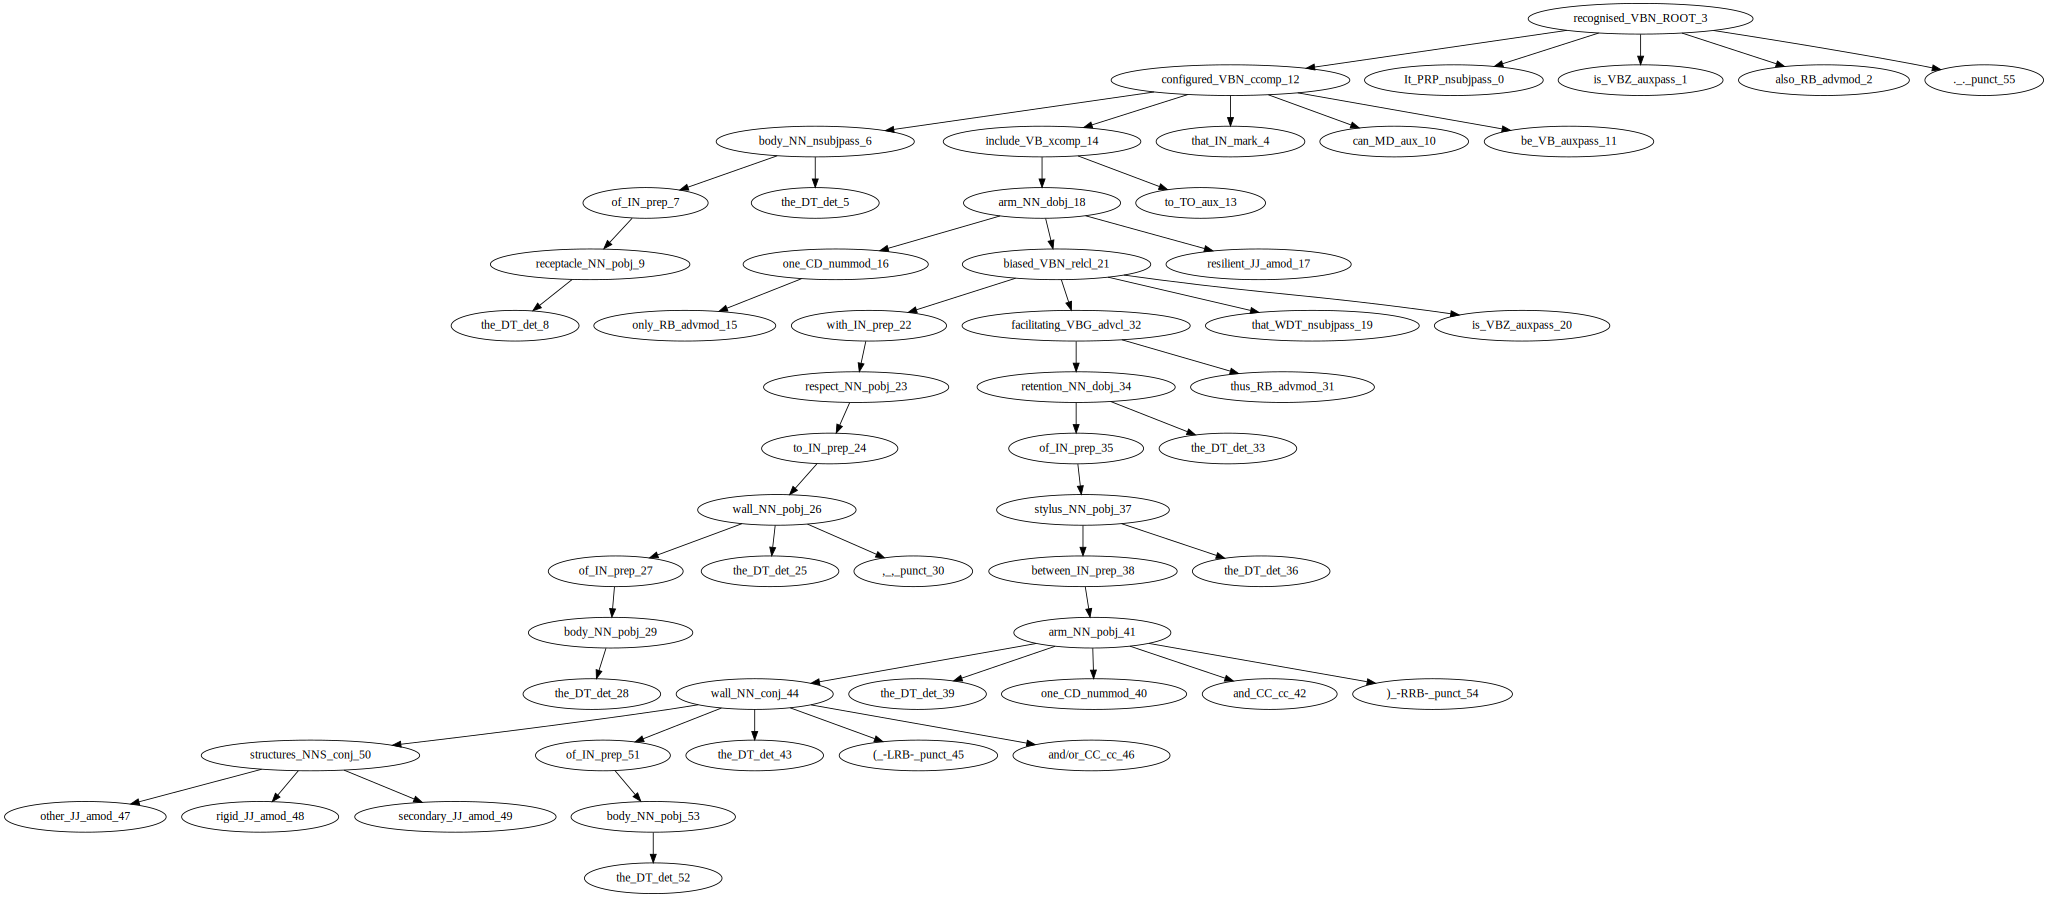

In [54]:
g_copy.get_graphviz()

Also need to get rid of the edge when removing the node.